In [35]:
import pandas as pd
import scipy.stats as st
import numpy as np
import random
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '../Dodge/data/'

In [3]:
!ls {path}

UCI              issue_close_time textmining
defect           smell


In [34]:
!ls {path}smell

DataClass.csv             binary_class              smell_details_38-MDLP.pkl
FeatureEnvy.csv           dataclass.txt             smell_details_38-more.pkl
GodClass.csv              dodge.pickle              smell_details_38.pkl
LongMethod.csv            ghost.ipynb
Qualitas Corpus.ipynb     performance_details_SOA.p


In [11]:
!head -n2 "{path}/issue_close_time/1 day/deeplearning.csv"

issueCleanedBodyLen,meanCommentSizeT,nActorsT,nCommentsT,nCommitsByActorsT,nCommitsByCreator,nCommitsByUniqueActorsT,nCommitsInProject,nCommitsProjectT,nIssuesByCreator,nIssuesByCreatorClosed,nIssuesCreatedInProject,nIssuesCreatedInProjectClosed,nIssuesCreatedProjectClosedT,nIssuesCreatedProjectT,nLabelsT,nSubscribedByT,timeOpen
31,0,2,0,3365,0,75,442,3443,1,0,41,34,1347,1496,0,0,True


In [38]:
!head -n2 '../Dodge/data/smell/GodClass.csv'

number_constructor_NotDefaultConstructor_methods,NOAM_type,isStatic_type,NOI_project,NOCS_project,CFNAMM_type,number_not_final_not_static_methods,number_public_visibility_methods,NOPK_project,num_static_attributes,LOC_project,LOC_type,number_not_abstract_not_final_methods,CBO_type,number_not_final_static_methods,NOM_project,DIT_type,num_static_not_final_attributes,number_constructor_DefaultConstructor_methods,AMWNAMM_type,NOCS_type,NOI_package,TCC_type,number_static_methods,ATFD_type,WOC_type,NOM_type,number_final_not_static_methods,RFC_type,number_final_static_methods,number_protected_visibility_attributes,num_final_not_static_attributes,NOA_type,NOCS_package,NOII_type,LOC_package,LCOM5_type,number_protected_visibility_methods,number_standard_design_methods,NMO_type,FANOUT_type,num_final_attributes,AMW_type,number_private_visibility_methods,LOCNAMM_type,number_package_visibility_methods,number_private_visibility_attributes,number_package_visibility_attributes,WMC_type,NOM_package,num_

In [24]:
entropy_1 = []

for i in range(30):
    # Pick random datasets from each category
    d1 = random.choice(os.listdir(os.path.join(path, 'defect')))
    
    time = random.choice(['1 day', '7 days', '14 days', '30 days', '90 days', '180 days', '365 days'])
    d2 = random.choice(
        os.listdir(
            os.path.join(path, 'issue_close_time', time)
        )
    )
    
    df1 = pd.read_csv(f'{path}defect/{d1}')
    df2 = pd.read_csv(f'{path}issue_close_time/{time}/{d2}')

    df1.drop(df1.columns[:3], axis=1, inplace=True)    
    df1.drop(df1.columns[-1], axis=1, inplace=True)
    df2.drop(df2.columns[-1], axis=1, inplace=True)
    
    df1 = np.array(df1, dtype=float)
    df2 = np.array(df2, dtype=float)
    
    for j in range(50):
        s1 = df1[np.random.randint(df1.shape[0])]
        s2 = df2[np.random.randint(df2.shape[0])]
        entropy_1.append(st.ks_2samp(s1, s2)[1])

<AxesSubplot:>

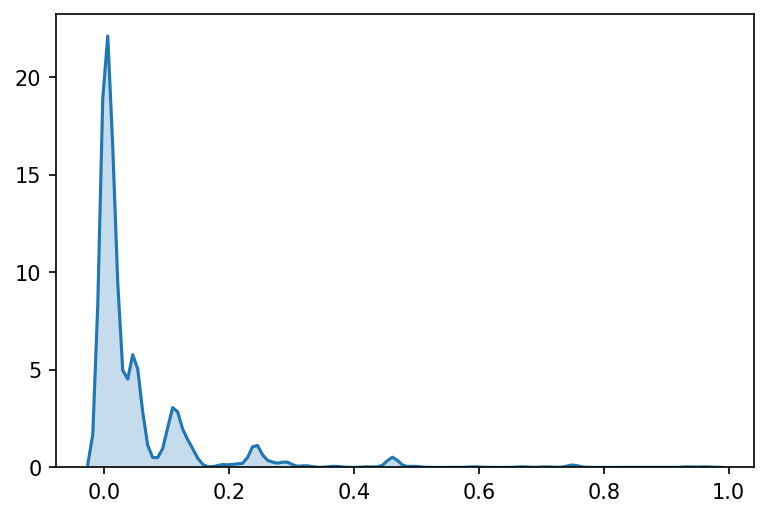

In [30]:
fig, ax = plt.subplots(dpi=150)
sns.kdeplot(entropy_1, shade=True, ax=ax)

In [33]:
entropy_1 = np.array(entropy_1)
print('p-value <= 0.01:', round(sum(entropy_1 <= 0.01) / len(entropy_1), 2))
print('p-value <= 0.05:', round(sum(entropy_1 <= 0.05) / len(entropy_1), 2))
print('p-value <= 0.10:', round(sum(entropy_1 <= 0.10) / len(entropy_1), 2))

p-value <= 0.01: 0.46
p-value <= 0.05: 0.75
p-value <= 0.10: 0.82


In [37]:
glob.glob(os.path.join(path, 'smell', '*.csv'))

['../Dodge/data/smell/GodClass.csv',
 '../Dodge/data/smell/LongMethod.csv',
 '../Dodge/data/smell/FeatureEnvy.csv',
 '../Dodge/data/smell/DataClass.csv']

In [44]:
entropy_2 = []

for i in range(30):
    # Pick random datasets from each category
    d1 = random.choice(os.listdir(os.path.join(path, 'defect')))
    d2 = random.choice(glob.glob(os.path.join(path, 'smell', '*.csv')))
    
    df1 = pd.read_csv(f'{path}defect/{d1}')
    df2 = pd.read_csv(d2)

    df1.drop(df1.columns[:3], axis=1, inplace=True)    
    df1.drop(df1.columns[-1], axis=1, inplace=True)
    df2.drop(df2.columns[-1], axis=1, inplace=True)
    
    #print(d1, df1)
    
    df1 = np.array(df1, dtype=float)
    df2 = np.array(df2, dtype=float)
    
    for j in range(50):
        s1 = df1[np.random.randint(df1.shape[0])]
        s2 = df2[np.random.randint(df2.shape[0])]
        entropy_2.append(st.ks_2samp(s1, s2)[1])

In [45]:
entropy_2 = np.array(entropy_2)
print('p-value <= 0.01:', round(sum(entropy_2 <= 0.01) / len(entropy_2), 2))
print('p-value <= 0.05:', round(sum(entropy_2 <= 0.05) / len(entropy_2), 2))
print('p-value <= 0.10:', round(sum(entropy_2 <= 0.10) / len(entropy_2), 2))

p-value <= 0.01: 0.18
p-value <= 0.05: 0.35
p-value <= 0.10: 0.45


<AxesSubplot:>

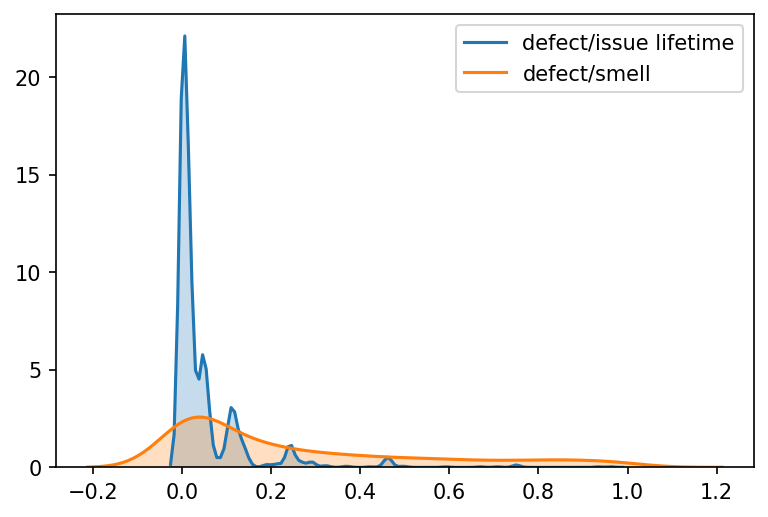

In [46]:
fig, ax = plt.subplots(dpi=150)
sns.kdeplot(entropy_1, shade=True, ax=ax, label='defect/issue lifetime')
sns.kdeplot(entropy_2, shade=True, ax=ax, label='defect/smell')

In [47]:
entropy_3 = []

for i in range(30):
    # Pick random datasets from each category
    time = random.choice(['1 day', '7 days', '14 days', '30 days', '90 days', '180 days', '365 days'])
    d1 = random.choice(
        os.listdir(
            os.path.join(path, 'issue_close_time', time)
        )
    )
    
    df1 = pd.read_csv(f'{path}issue_close_time/{time}/{d1}')
    
    d2 = random.choice(glob.glob(os.path.join(path, 'smell', '*.csv')))
    df2 = pd.read_csv(d2)

    df1.drop(df1.columns[-1], axis=1, inplace=True)
    df2.drop(df2.columns[-1], axis=1, inplace=True)
    
    #print(d1, df1)
    
    df1 = np.array(df1, dtype=float)
    df2 = np.array(df2, dtype=float)
    
    for j in range(50):
        s1 = df1[np.random.randint(df1.shape[0])]
        s2 = df2[np.random.randint(df2.shape[0])]
        entropy_3.append(st.ks_2samp(s1, s2)[1])

In [48]:
entropy_3 = np.array(entropy_3)
print('p-value <= 0.01:', round(sum(entropy_3 <= 0.01) / len(entropy_3), 2))
print('p-value <= 0.05:', round(sum(entropy_3 <= 0.05) / len(entropy_3), 2))
print('p-value <= 0.10:', round(sum(entropy_3 <= 0.10) / len(entropy_3), 2))

p-value <= 0.01: 0.45
p-value <= 0.05: 0.65
p-value <= 0.10: 0.74


<AxesSubplot:>

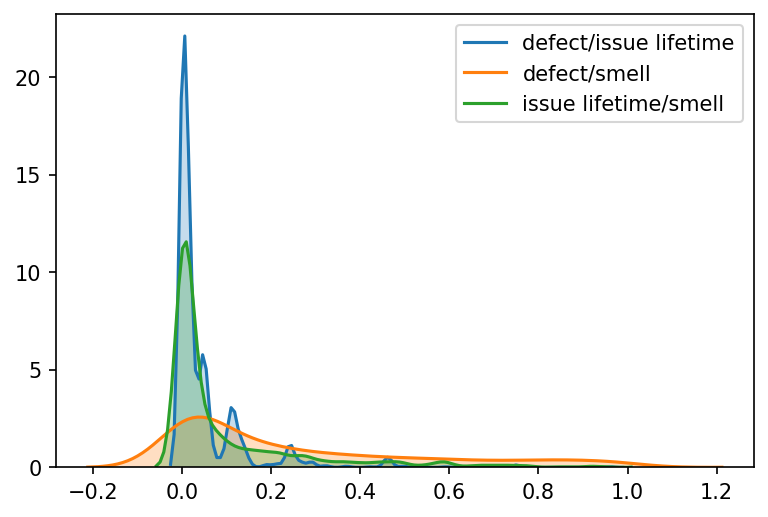

In [49]:
fig, ax = plt.subplots(dpi=150)
sns.kdeplot(entropy_1, shade=True, ax=ax, label='defect/issue lifetime')
sns.kdeplot(entropy_2, shade=True, ax=ax, label='defect/smell')
sns.kdeplot(entropy_3, shade=True, ax=ax, label='issue lifetime/smell')

|           | Defect/smell | defect/issue lifetime | issue lifetime/smell |
| --------- | ------------ | --------------------- | -------------------- |
| p <= 0.01 | 0.18         | 0.46                  | 0.45                 |
| p <= 0.05 | 0.35         | 0.75                  | 0.65                 |
| p <= 0.1  | 0.45         | 0.82                  | 0.74                 |